## Decision Tree- Regression

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)
#pd.options.display.float_format = '{:.3f}'.format

In [112]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [113]:
df.shape

(301, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [115]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


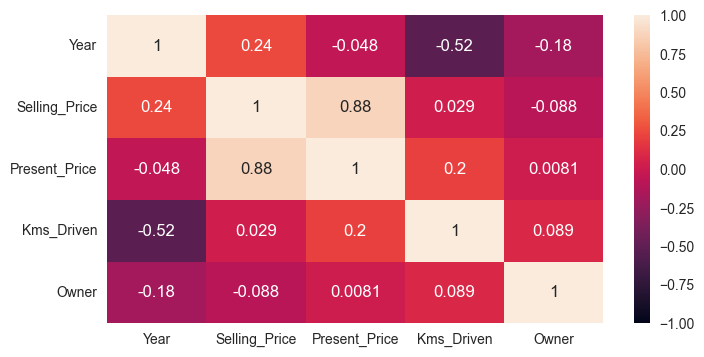

In [117]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [118]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [119]:
df["vehicle_age"]=2022-df.Year

# Datamızdaki araç üretim yılını age featurune dönüştürüyoruz.

In [120]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


In [121]:
df.select_dtypes("object").head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [122]:
for i in df.select_dtypes("object"):

    print(i, len(df[i].value_counts()))

# kategorik featurların kaç unique gözlemden oluştuğu görüyoruz. car_name'in unique kategorik gözlem sayısı datamızdaki toplam 
# gözlem sayısına nazaran çok yüksek.

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [123]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [124]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# 301 gözlemim olmasına rağmen car_name'de 98 tane unique araba/motor markası mevcut. Bu featura ordinal encoder uygulayarak
# numeric verilere döünüştürmek anlamlı bir hareket tarzı olmayacak. Çünkü DT modeli high cardinality categorical featureslara 
# (çok fazla unique kategorik gözlemler içeren featurlar) daha fazla önem yükleme eğilimindedir. Bu da bu featurların feature
# importanceda daha ön plana çıkmasına sebep olur. 

# Ayrıca  çoğu marka ve modelden 1-2 adet mevcut. Doğal olarak eğitime bir katkısı olmayacağından bu featura kaldırıyoruz.

# Araç üretim yılı olan Year featurını da Age featurına dönüştrdüğümüzden Year featurenıda car_name ile birlikte kaldırıyoruz.

In [125]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


<Axes: xlabel='Selling_Price', ylabel='Count'>

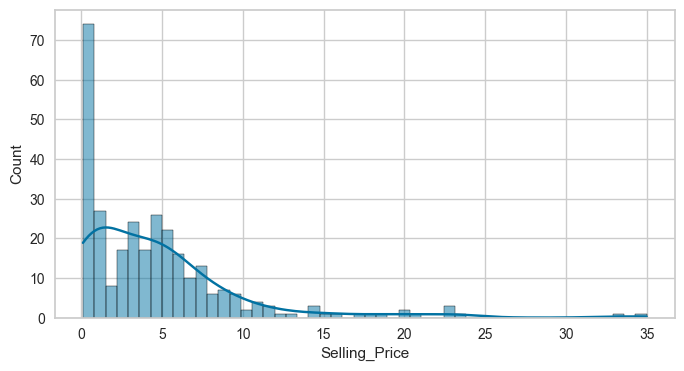

In [126]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

# tree based modeller outlierlara karşı çok robustdur(güçlüdür). Ancak küçük regression datalarında bu durum geçerli değildir.
# Küçük regression datalarında outlier dağerler düştüğü yapraklardaki ortalama fiyatları ciddi şekilde yükseltebiliğinden veya 
# azaltabildiğinden eğitim için yetersiz olan bu outlier gözlemleri düşürmek tree based modellerde önem arzediyor.

# Ancak her zaman olduğu gibi hem outlierlar ile hem de outlierları düşürerek skorları karşılaştırıp farklarını görmeliyiz.

<Axes: >

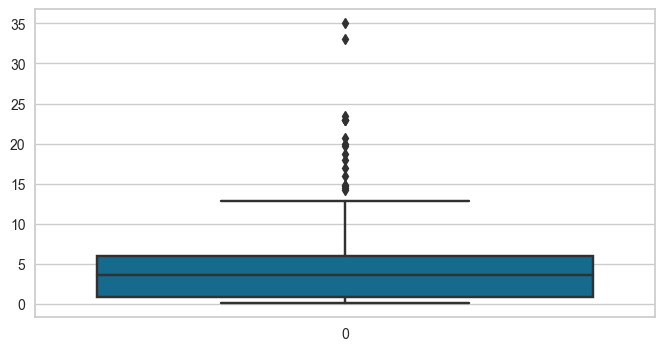

In [127]:
sns.boxplot(df.Selling_Price)

In [128]:
df2 = df.copy()

## Train test split

In [129]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modeling with Pipeline

In [131]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [132]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.#

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# classification notebokunda yaptığımız işlemleri aynen tekrarlıyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [134]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [135]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [136]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting olduğuna dair insightımızı aldık. CV'da kesin kararımızı vereceğiz.

,train,test
R2,1.000,0.941
mae,0.000,0.676
mse,0.000,1.593
rmse,0.000,1.262


In [137]:
# pd.options.display.float_format = '{:.3f}'.format
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.941
mae,0.000,0.676
mse,0.000,1.593
rmse,0.000,1.262


In [138]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv =10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting olduğunu teyit ettik

test_r2                              0.851
train_r2                             1.000
test_neg_mean_absolute_error        -0.891
train_neg_mean_absolute_error       -0.000
test_neg_mean_squared_error         -4.466
train_neg_mean_squared_error        -0.000
test_neg_root_mean_squared_error    -1.790
train_neg_root_mean_squared_error   -0.000
dtype: float64

## Removing Outliers

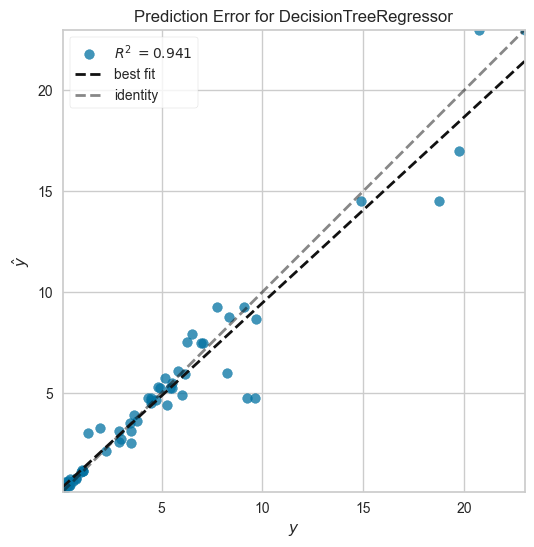

In [139]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# 10 dan büyük fiyatların tahminleri bozduğunu gördük.

In [140]:
len(df[df.Selling_Price > 10])

# datada 10 üzerinde 28 tane gözle var. Ve tüm datama oranı %9 olduğundan drop ediyorum.

28

In [141]:
28/301

0.09302325581395349

In [142]:
df_new = df[df.Selling_Price < 10]
df_new.head()

# 10'dan büyük fiyatları filtreledik

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


In [143]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

# filtrelenmiş dataya göre tekrar X ve y'mizi tekrar atadık.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# filtrelenmiş datamızı train ve test setlerine ayırdık

In [145]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [146]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# filtreleme işlemi sonrası test datamızın skorları daha da iyileşti ancak overfiting hala giderilemedi.

,train,test
R2,1.000,0.945
mae,0.000,0.410
mse,0.000,0.377
rmse,0.000,0.614


       train	test
R2	   1.000	0.941
mae	   0.000	0.676
mse	   0.000	1.593
rmse   0.000	1.262

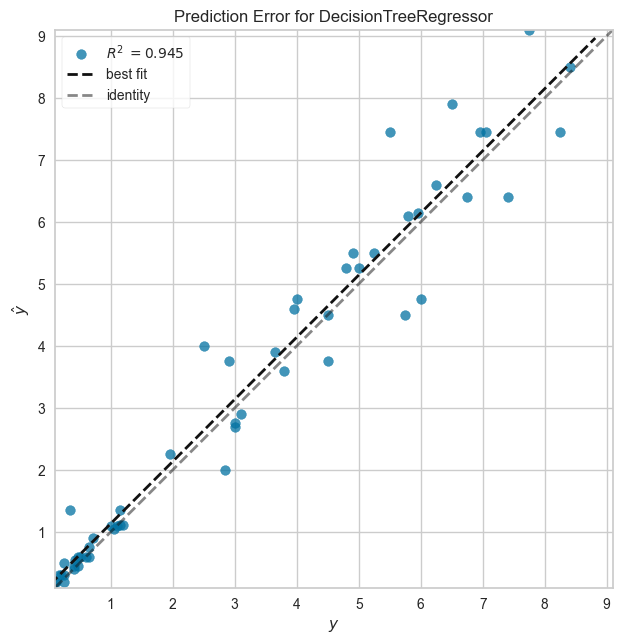

In [147]:
visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Filtreleme sonrası skorların daha iyileştiğini burda da görüyoruz.

## Visualizing trees

In [148]:
from sklearn.tree import plot_tree

In [149]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()

new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

# pipeline içerisinde make_column_transform fonksiyonu kullanıldığından feature sırlamasının değiştiğini unutmuyoruz.
# ordinalencoder__ ve remainder__ ön eklerinden kurtuluyoruz.

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [150]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features).head(1)

# make_column_transform sonrası yapısı değişen df'in son hali. Gördüğünüz gibi kategorik featurlar en öne takiben numaric
# featurlar gelmiş.

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.000,0.000,1.000,10.000,18828.000,0.000,7.000


In [151]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
269,10.000,18828,Petrol,Dealer,Manual,0,7


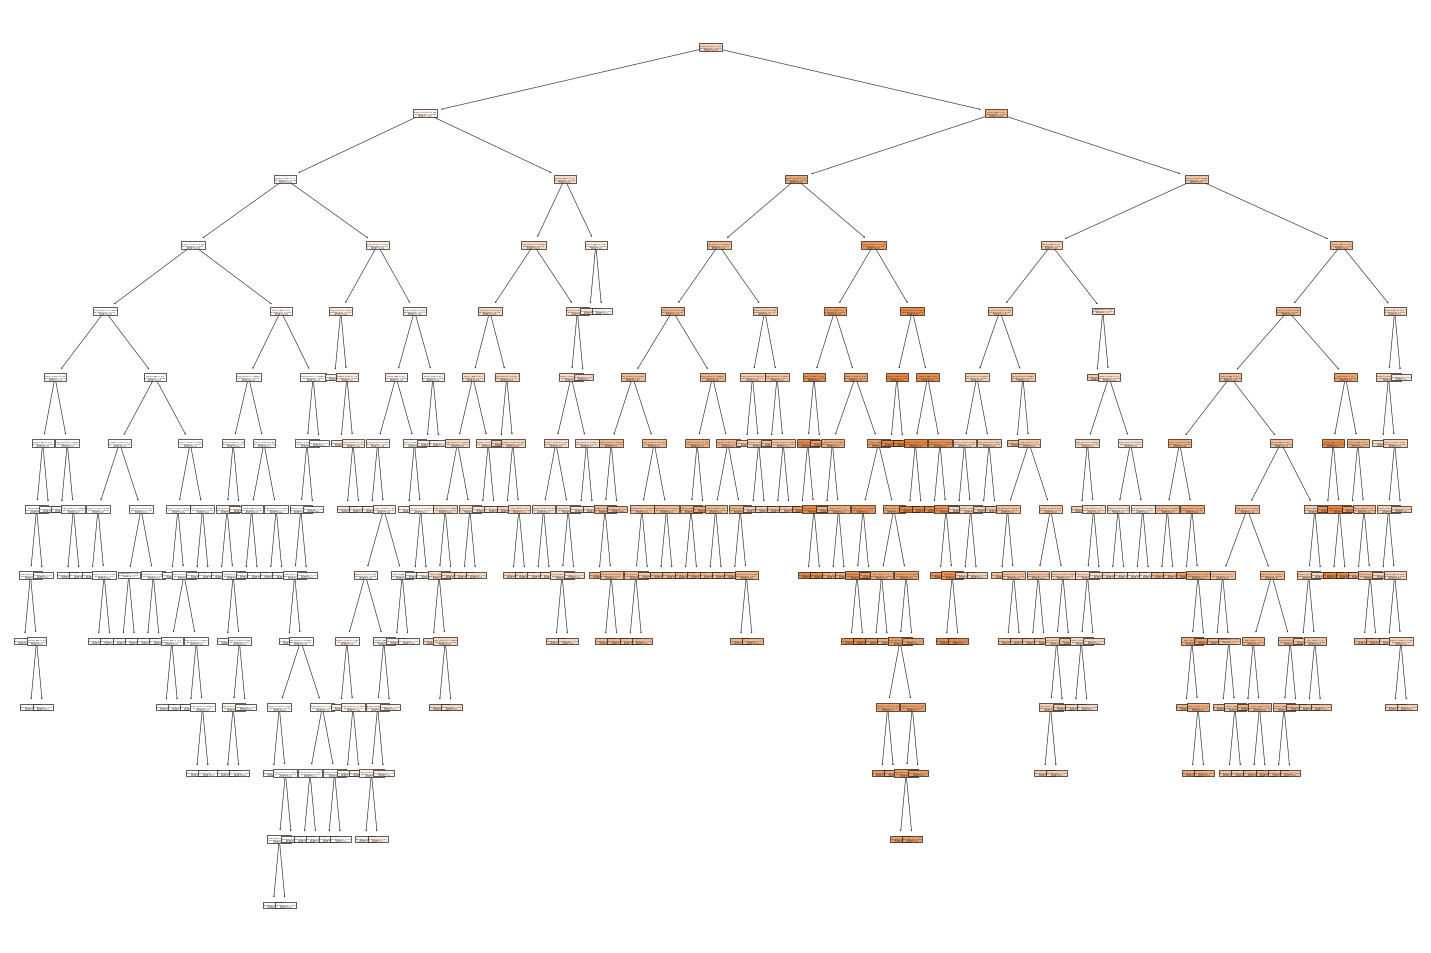

In [152]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features); #feature_names=X.columns

# tree based modellerin regression problemlerinde dallanmalar classification problemlerine nazaran çok daha fazla olur.

In [153]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"],filled=True, feature_names=new_features, fontsize=8); #feature_names=X.columns

# Bu fonksiyon ile train ve test seti skorlarını karşılaştırıp ağacımızı görselleştiriyoruz.



      train  test
R2    0.887 0.890
mae   0.578 0.574
mse   0.815 0.754
rmse  0.903 0.868




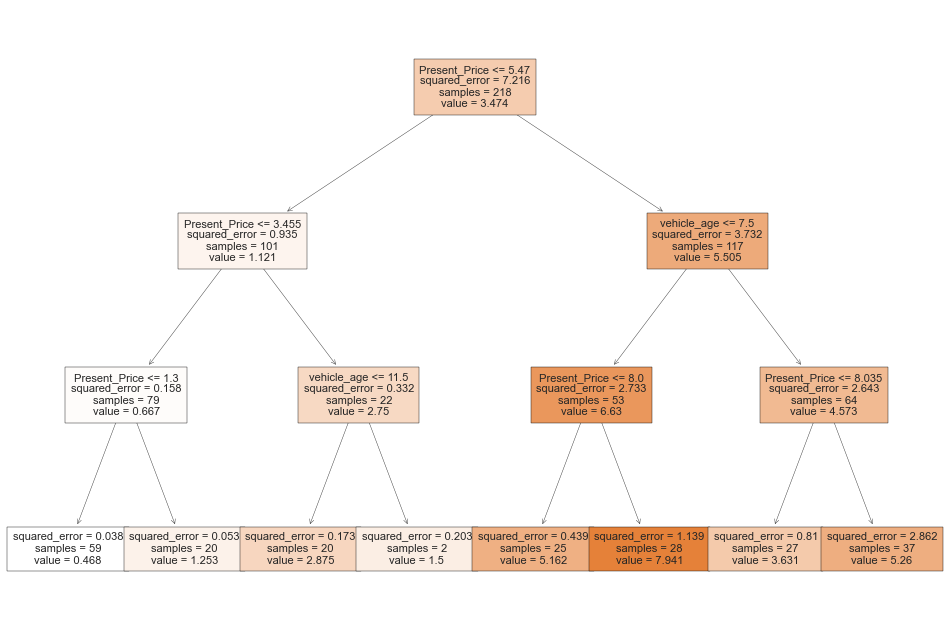

In [154]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(criterion='squared_error',
                                                 max_depth=3,
                                                 random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

report_model(pruned_tree)

# clasificationdan tek farkı criterion='squared_error'dür. Hatırlarsanız clasification da bu hyper_parametre gini veya entropy
# oluyordu. Regressionda criterion= "squared_error", "friedman_mse", "absolute_error", "poisson" değerlerinden birini 
# alabiliyor. Ama genellikle model en iyi sonuçları "squared_error"da aldığı için default olarak bu değer kullanılıyor.

# squared error, mean squared error'ü temsil ediyor.Bir yaprağın errorünün 0 olması o yaparağa düşen tüm arabaların aynı fiyatta
# olduğunu gösterirken 0'a yakın bir değer olması fiyatları biribirine çok yakın arabalar olduğunu gösterir Yüksek bir error 
# değeri ise o yaprağa fiyatları biribirinden çok alakasız arabaların düştüğünü gösterir. 

# sampales ilgili yapraktaki toplam gözlem sayısını gösterir.

# value ilgili yapraktaki gözlemlerin ortalama fiyatını gösterir.

# predict ettiğimiz bir gözle hangi yaprağa düşerse o yapraktaki value değeri arabanın model tarafından tahmin edilen değeri
# olur.

## GridSearch

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [157]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "DT_model__max_depth": [2, 3],
              "DT_model__min_samples_leaf": [1, 2, 3, 4],
              "DT_model__min_samples_split": [2, 3, 4],
              "DT_model__max_features":[4, 5, 6, None]}

In [158]:
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [159]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error', 'poisson'],
                         'DT_model__max_depth': [2, 3],
                         'DT_model__max_features': [4, 5, 6, None],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4],
                         'DT_model__min_samples_split': [2, 3, 4],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [160]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [161]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]
# overfitingin tamamen gidirildiğini gördük.

mean_test_score    -0.935
mean_train_score   -0.900
Name: 552, dtype: object

In [162]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# test datası skorları ile CV'dan aldığımız validation seti skorlarının tutarlı olduğunu gördük.

,train,test
R2,0.879,0.892
mae,0.588,0.593
mse,0.871,0.740
rmse,0.933,0.860


In [163]:
y.mean()

3.4022710622710624

In [164]:
0.86/3.4

# test datası rmse göre model ortalama %25 hata yapıyor.

0.2529411764705882

In [165]:
0.935/3.4

# CV valiadation setinin ortalama skorlarına göre ortalama %27 hata yapıyor.

0.275

In [166]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3,
                                                 criterion='absolute_error',
                                                 random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.iloc[:,2:]

# tüm metricleri görmek içinde CV yapabiliriz.
# CVdaki tüm iterasyonlara baktığımızda bazı skorların çok farklı olduğunu görebiliyoruz. Çok küçük datalarda beklenen
# bir durumdur.

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.912,0.887,-0.545,-0.571,-0.486,-0.840,-0.697,-0.917
2,0.906,0.892,-0.500,-0.555,-0.545,-0.798,-0.738,-0.893
3,0.712,0.901,-0.998,-0.524,-1.551,-0.730,-1.245,-0.854
4,0.958,0.882,-0.370,-0.566,-0.307,-0.849,-0.554,-0.922
5,0.926,0.887,-0.546,-0.548,-0.519,-0.818,-0.720,-0.904
6,0.877,0.892,-0.780,-0.524,-1.101,-0.756,-1.049,-0.870
7,0.906,0.875,-0.562,-0.595,-0.630,-0.906,-0.794,-0.952
8,0.838,0.883,-0.702,-0.582,-1.121,-0.844,-1.059,-0.919
9,0.856,0.888,-0.673,-0.562,-1.513,-0.765,-1.230,-0.875
10,0.788,0.887,-0.720,-0.582,-1.596,-0.809,-1.263,-0.899


In [167]:
df_scores.mean()[2:]

# ortalamalarına göre 

test_r2                              0.868
train_r2                             0.888
test_neg_mean_absolute_error        -0.639
train_neg_mean_absolute_error       -0.561
test_neg_mean_squared_error         -0.937
train_neg_mean_squared_error        -0.811
test_neg_root_mean_squared_error    -0.935
train_neg_root_mean_squared_error   -0.900
dtype: float64

In [168]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.879,0.892
mae,0.588,0.593
mse,0.871,0.740
rmse,0.933,0.860


## Feature İmportance

In [169]:
operations = [("OrdinalEncoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3, 
                                                 criterion='absolute_error',
                                                 random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

# feature importance için gridsearch sonrası bulduğumuz en iyi hyper parametreleri kullanmamız gerektiğini unutmuyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [170]:
X_train.head(1)

# pipeline içerisinde make_colum_transform kullanıldığından burdaki feture isimlerini kullanmıyoruz.

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
269,10.000,18828,Petrol,Dealer,Manual,0,7


In [171]:
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [172]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=new_features).head()

# make_colum_transform sonrası yeni df'in feature isimlerini sırasıyla gösteren new_features listesini kullanıyoruz. 

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.000,0.000,1.000,10.000,18828.000,0.000,7.000
1,2.000,1.000,1.000,1.050,213000.000,0.000,12.000
2,2.000,0.000,1.000,5.970,5600.000,0.000,6.000
3,2.000,0.000,1.000,9.400,60241.000,0.000,9.000
4,2.000,0.000,1.000,4.430,28282.000,0.000,7.000


In [173]:
df_f_i = pd.DataFrame(data = pipe_model["DT_model"].feature_importances_, 
                      index=new_features, 
                      columns=["Feature Importance"])

df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)

df_f_i

# Gördüğünüz gibi DT 2 feature hariç diğer featurlardan bir insight çıkaramamış. Çünkü DT herzaman en iyi featurlara yoğunlaşır.

,Feature Importance
Present_Price,0.828
vehicle_age,0.172
Fuel_Type,0.000
Seller_Type,0.000
Transmission,0.000
Kms_Driven,0.000
Owner,0.000


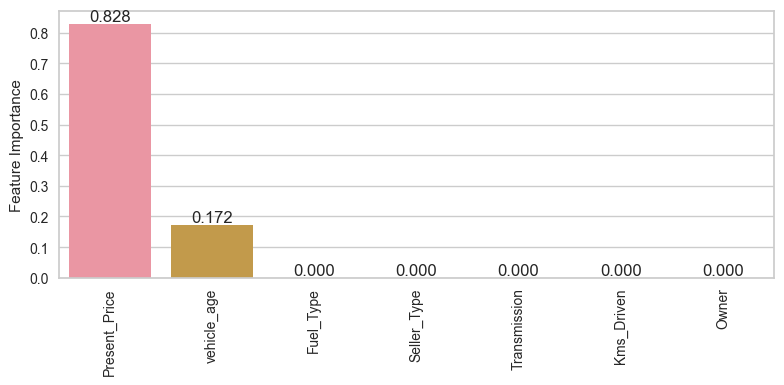

In [174]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

# feature importance değerlerimizi barplot ile görselleştiriyoruz.

## Compore real and predicted result

In [175]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

# modelin tahminleri başarılı bir şekilde yapıp yapamadığı görmek için gerçek, tahmin edilen değerler ile residulları
# karşılaştırıyoruz.

In [176]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
285,7.400,7.500,-0.100
149,0.510,0.480,0.030
268,4.800,4.750,0.050
85,2.500,4.750,-2.250
200,0.100,0.200,-0.100
271,3.000,4.750,-1.750
205,5.250,4.750,0.500
60,6.950,4.750,2.200
288,8.400,7.500,0.900
173,0.400,0.480,-0.080


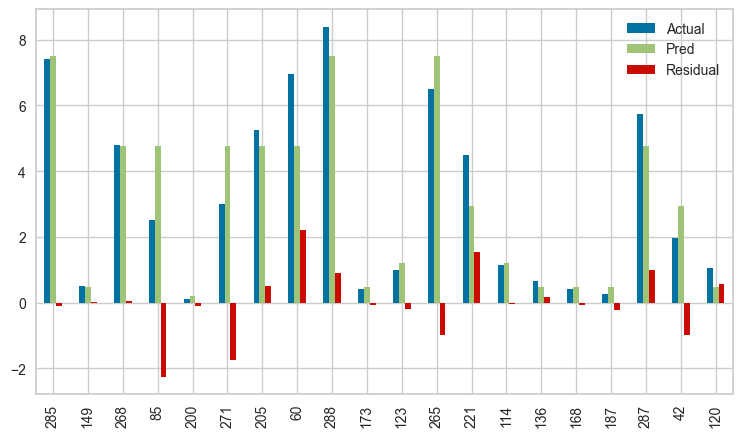

In [177]:
comp_sample.plot(kind='bar',figsize=(9,5))
plt.show()

## Final Model

In [178]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [179]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans), 
              ("DT_model", DecisionTreeRegressor(max_depth=3, 
                                                 criterion='absolute_error', 
                                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

# final modelimizi en iyi hyper parametrelerle tüm data için yenden kuruyoruz.

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

## Prediction

In [180]:
X.describe()

,Present_Price,Kms_Driven,Owner,vehicle_age
count,273.000,273.000,273.000,273.000
mean,5.879,36516.941,0.048,8.527
std,4.955,39529.116,0.260,2.943
min,0.320,500.000,0.000,4.000
25%,0.990,15001.000,0.000,6.000
50%,5.700,32000.000,0.000,8.000
75%,8.920,48000.000,0.000,10.000
max,23.730,500000.000,3.000,19.000


In [181]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [182]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [183]:
pipe_model.predict(df_samples)

array([4.65, 6.9 ])